1: Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats

    The Simple Linear Regression model is used to describe the relationship between the predictor variable(X) and the outcome variable(Y). The predictor variable is the independent variable used to try to predict the outcome variable. The line that represents the relationship between the two variables is defined by the slope and intercept coefficients. The intercept coefficient(β₀) is the predicted value of the outcome variable when the predictor variable is zero. The slope coefficient(β₁) represents the rate of change of the outcome variable per unit change of the predictor variable. The error term(ε) represents the difference between the predicted value of the outcome variable and the observed value of the outcome variable, visually, this is the distance between the line and the points(which are observed values of the outcome variables) scattered around the line. The model assumes that the error terms are normally distributed with a mean of zero and a constant variance.
    They combine to form a sample from normal distribution from the assumption about the error term. Since the model assumes that the error term are normally distributed, this means that the values of the outcome variable will also be normally distributed, with more values closer to the line and less values further away.

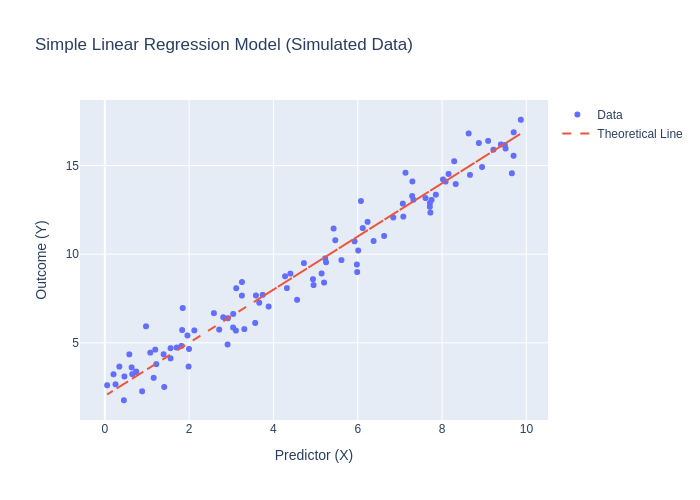

In [1]:
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go

# Parameters for the model
n = 100  # number of data points
beta0 = 2  # intercept
beta1 = 1.5  # slope
sigma = 1.0  # standard deviation of the errors

# Generate predictor variable X
np.random.seed(42)  # for reproducibility
X = stats.uniform.rvs(0, 10, size=n)  # predictors sampled from a uniform distribution

# Generate error terms (normally distributed with mean 0 and standard deviation sigma)
errors = stats.norm.rvs(0, sigma, size=n)

# Calculate outcome variable Y based on the Simple Linear Model
Y = beta0 + beta1 * X + errors

# Visualization using Plotly
fig = go.Figure()

# Add scatter plot for the simulated data
fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', name='Data'))

# Add the theoretical regression line (without errors)
Y_line = beta0 + beta1 * X
fig.add_trace(go.Scatter(x=X, y=Y_line, mode='lines', name='Theoretical Line', line=dict(dash='dash')))

# Set plot title and labels
fig.update_layout(title="Simple Linear Regression Model (Simulated Data)",
                  xaxis_title="Predictor (X)",
                  yaxis_title="Outcome (Y)",
                  showlegend=True)

# Show plot
fig.show(renderer="png")

https://chatgpt.com/share/6722a64c-d330-8001-9149-89b6d3d48056

2: Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf

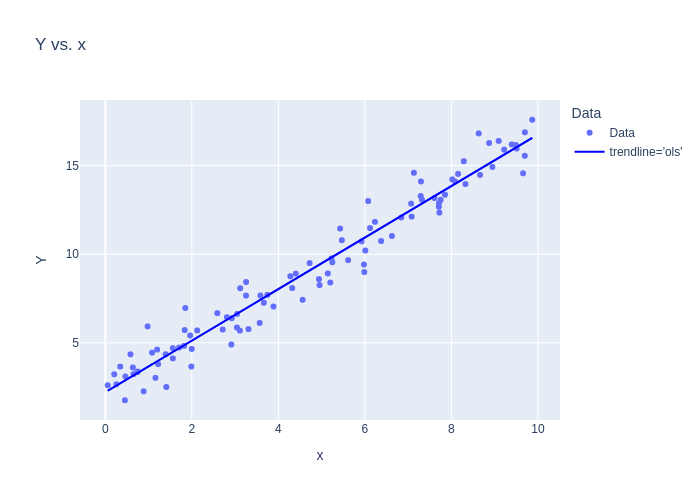

In [10]:
import statsmodels.formula.api as smf  # what is this library for?
import plotly.express as px  # this is a ploting library
import pandas as pd

# Assuming x and Y are already defined as lists or arrays
df = pd.DataFrame({'x': X, 'Y': Y})

# what are the following two steps doing?
model_data_specification = smf.ols("Y~x", data=df) 
# This line creates an Ordinary Least Squares (OLS) regression model, predicting Y based on x using the data in df
fitted_model = model_data_specification.fit() 
#This line fits the OLS model above to the data

# what do each of the following provide?
fitted_model.summary()  # returns a detailed summary of the regression results 
fitted_model.summary().tables[1]  # returns the second table of the summary
fitted_model.params  # returns the estimated intercept and slope coefficients of the regression model
fitted_model.params.values  # returns the numerical values of the estimated coefficients
fitted_model.rsquared  # returns the R-squared value, which measures how well the model explains the variability in the dependent variable Y

# what two things does this add onto the figure? 
df['Data'] = 'Data' # hack to add data to legend 
# creates a new column in df with the label 'Data'
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')
# creates a scatter plot of Y vs. X and adds a trendline (OLS regression) to the plot

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

3: Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation
    
    The theoretical line is the line based on the intercept and slope coefficient that we use to simulate the data, this line is generated by the equation Y= β₀ + β₁X and represents the relationship between X and Y withouth considering the variations. The fitted line is based on the data we generated, which contains error, and hence does not perfectly match the theoretical line. We get the fitted line by estimating the slope and intercept based on the observed data, and plotting it using the OLS fitting from the statsmodels library.
    
    https://chatgpt.com/share/6722a64c-d330-8001-9149-89b6d3d48056

In [ ]:
import statsmodels.formula.api as smf  # what is this library for?
import plotly.express as px  # this is a ploting library

# what are the following two steps doing?
model_data_specification = smf.ols("Y~x", data=df) 
# This line creates an Ordinary Least Squares (OLS) regression model, predicting Y based on x using the data in df
fitted_model = model_data_specification.fit() 
#This line fits the OLS model above to the data

# what do each of the following provide?
fitted_model.summary()  # returns a detailed summary of the regression results 
fitted_model.summary().tables[1]  # returns the second table of the summary
fitted_model.params  # returns the estimated intercept and slope coefficients of the regression model
fitted_model.params.values  # returns the numerical values of the estimated coefficients
fitted_model.rsquared  # returns the R-squared value, which measures how well the model explains the variability in the dependent variable Y

# what two things does this add onto the figure? 
df['Data'] = 'Data' # hack to add data to legend 
# creates a new column in df with the label 'Data'
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')
# creates a scatter plot of Y vs. X and adds a trendline (OLS regression) to the plot

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

# what does this add onto the figure in constrast to `trendline='ols'`?
x_range = np.array([df['x'].min(), df['x'].max()])
# beta0 and beta1 are assumed to be defined
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

4: Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

    The fitted model uses the estimated parameters to predict the Y values based on the observed X values. From the fitted_model.summary().tables[1], the coef column shows the estimated intercept and slope coefficient, which is what fitted_model.params and fitted_model.params.values also gives. Since we know the estimated slope and intercept coefficient, we can get the fitted values by applying the equaiton Ŷ = βˆ₀ + βˆ₁X to each X.
    
    https://chatgpt.com/share/6722a64c-d330-8001-9149-89b6d3d48056

5: Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"

    The line that minimize the residual between Y and Ŷ is chosen. It requires suqares to make all the errors positive, preventing positive and negative residuals from canceling eachother out, and to emphasize larger error to make sure the line minimize deviation and provides the best overall fit to the data.

6: Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.
1: 1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()
2: fitted_model.rsquared
3: np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2
4: np.corrcoef(Y,x)[0,1]**2

    For the first expression, we are calculating R-squared by comparing the total variation in Y to the residuals after fitting the model. In the numerator, we have the sum of squared residuals, in the denominator, we have the total sum of squares, by subtracting this from one, we get the proportion of variation in Y. Fitted_model.rsquared does the same thing as the first expression, a higher R-squared value means that the model explains more of the variation in Y, indicating a better fit, and that is how it can be interpreted as a measure of the accuracy of the model. The np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2 expression calculates the square of the correlation coefficient between Y and the model’s predicted values, in this case, this is the same as calculating R-squared, and therefore captures the same thing as the expression for R-squared. The np.corrcoef(Y,x)[0,1]**2 calculates the squared correlation between Y and the predictor x, it measures the strength of the linear relationship between Y and x directly.
    
    https://chatgpt.com/share/6722a64c-d330-8001-9149-89b6d3d48056

7: Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below

    For a Simple Linear Regression model, as the name suggest, we assume that the relationship between the X and Y values are linear, but for the example data below, the relationship between X(Amount of Fertilizer (kg)) and Y(Crop Yield (tons)) seems to be curved.
    Also, for a Simple Linear Regression model, we assume that the variance of residuals is constant across all values of X, but looking at the example data, that does not seem to be the case.
    
    https://chatgpt.com/share/6722a64c-d330-8001-9149-89b6d3d48056

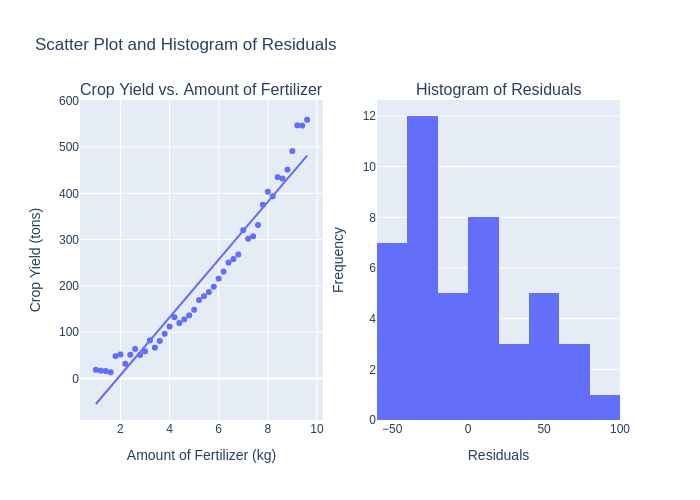

In [31]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png")

8： Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

    The null hypothesis can be stated as H₀: β₁ = 0, which means that there are no relationship between the two variables. From the data, we get the result that the p-value is 0.000, which provides a very strong evidence against the null hypothesis. Therefore, we reject the null hypothesis and conclude that there is a linear association between the two variables. The R-squared value is 0.811, meaning that 81.1% of the variability in dependent variable is explained by the dependent variable, suggesting a strong linear relationship between the two variables and indicating that the model fits the data well.

In [1]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        19:51:33   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

9: As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.

    For each short wait time, we examine the p-value of the waiting coefficient, which is 0.238 for 62 min, 0.036 for 64 min, and 0.000 for 66 min. Based on the p-values, we can see if there is evidence for or against the null-hypothesis for each of the three cases, and decides if the relationship between the two variables are driven by longer wait times or not. 

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


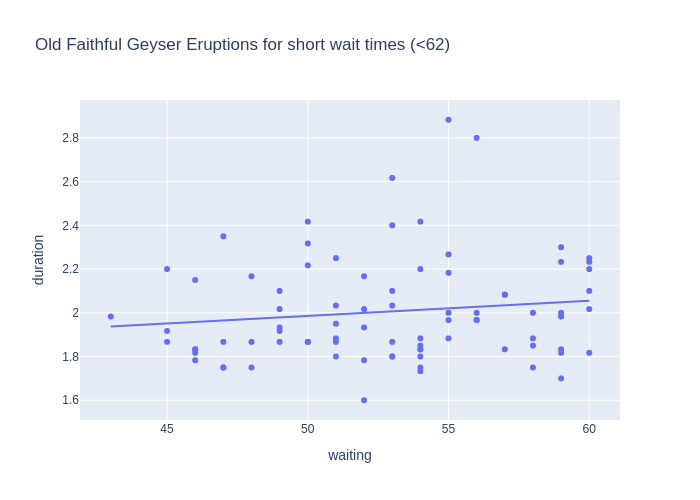

In [2]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


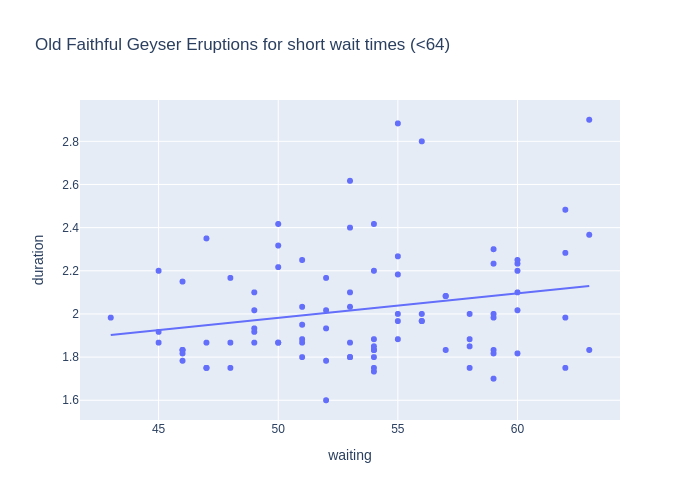

In [3]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64 # 62 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


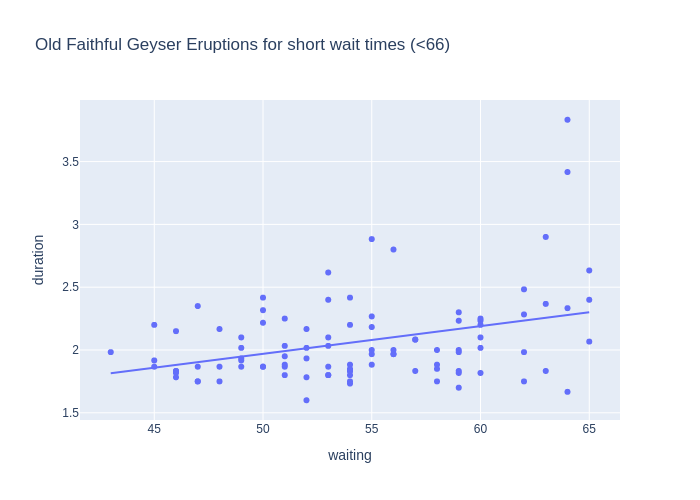

In [4]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 # 64 # 62 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

10: Let's now consider just the (n=160) long wait times (as specified in the code below), and write code to do the following:

create fitted Simple Linear Regression models for boostrap samples and collect and visualize the bootstrapped sampling distribution of the fitted slope coefficients of the fitted models;

simulate samples (of size n=160) from a Simple Linear Regression model that uses β₀ = 1.65, β₁ = 0, and σ = 0.37 along with the values of waiting for x to create simuations of Y and use these collect and visualize the sampling distribution of the fitted slope coefficient under a null hypothesis assumption of "no linear association (on average)"; then,

report if 0 is contained within a 95% bootstrapped confidence interval; and if the simulated p-value matches smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]?

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


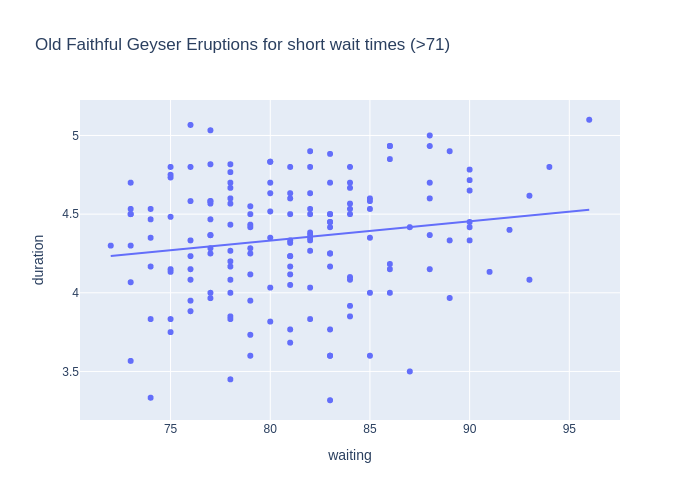

In [5]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

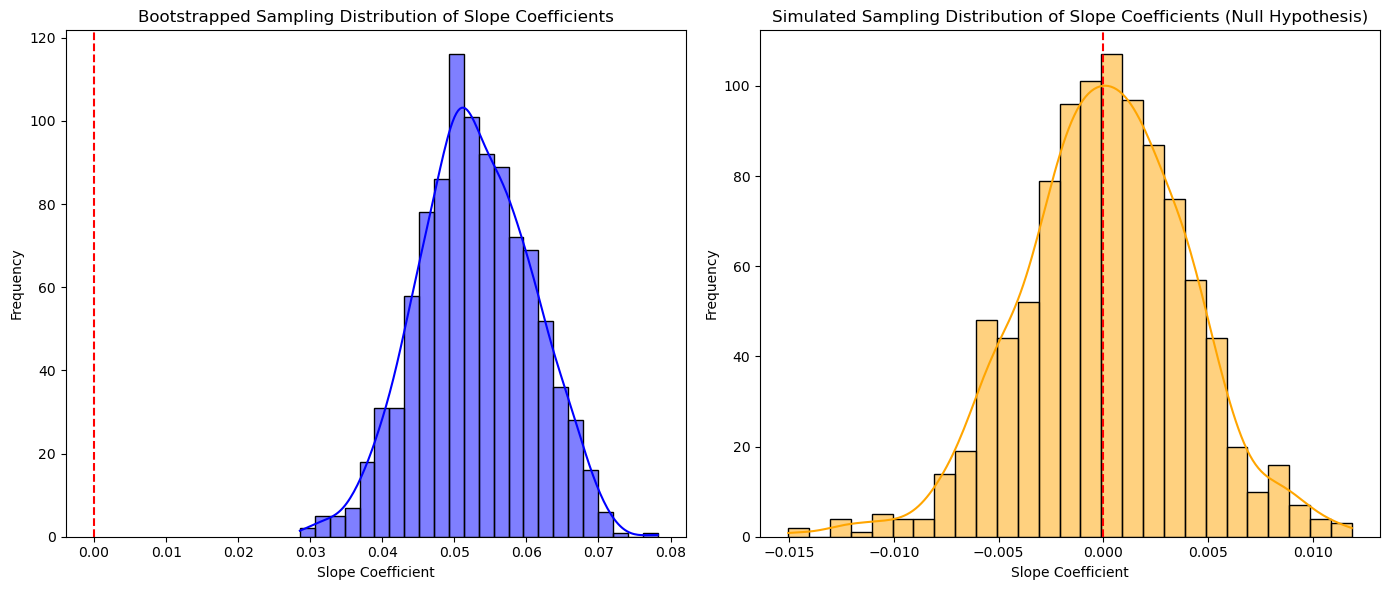

95% Bootstrapped Confidence Interval for Slope Coefficient: [0.03745404 0.06742054]
Does the 95% bootstrapped confidence interval contain 0?: False
Simulated p-value: 0.0
Actual p-value from original model:  0.000


In [7]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')
# Select only long wait times
long_wait = old_faithful.waiting >= 63
long_wait_data = old_faithful[long_wait]
n = long_wait_data.shape[0]

# Parameters for null hypothesis simulation
beta0_null = 1.65
beta1_null = 0
sigma_null = 0.37
num_simulations = 1000  # Number of bootstrap/simulation iterations

# Step 1: Bootstrapped Sampling Distribution of Fitted Slope Coefficients
bootstrap_slope_coefficients = []

for _ in range(num_simulations):
    # Bootstrap sample
    bootstrap_sample = long_wait_data.sample(n=n, replace=True)
    # Fit the model and store the slope coefficient
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrap_slope_coefficients.append(model.params['waiting'])

# Step 2: Simulated Sampling Distribution under Null Hypothesis
simulated_slope_coefficients = []

for _ in range(num_simulations):
    # Simulate Y under null hypothesis (no association)
    old_faithful_simulation = long_wait_data.copy()
    old_faithful_simulation['duration'] = (
        beta0_null + beta1_null * old_faithful_simulation.waiting +
        stats.norm(loc=0, scale=sigma_null).rvs(size=n)
    )
    # Fit the model and store the slope coefficient
    model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(model.params['waiting'])

# Convert lists to arrays for easy analysis
bootstrap_slope_coefficients = np.array(bootstrap_slope_coefficients)
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Step 3: Visualization of Bootstrapped and Simulated Distributions
plt.figure(figsize=(14, 6))

# Bootstrapped slope coefficients
plt.subplot(1, 2, 1)
sns.histplot(bootstrap_slope_coefficients, kde=True, color='blue')
plt.axvline(0, color='red', linestyle='--')
plt.title('Bootstrapped Sampling Distribution of Slope Coefficients')
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')

# Simulated slope coefficients under null hypothesis
plt.subplot(1, 2, 2)
sns.histplot(simulated_slope_coefficients, kde=True, color='orange')
plt.axvline(0, color='red', linestyle='--')
plt.title('Simulated Sampling Distribution of Slope Coefficients (Null Hypothesis)')
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 4: Confidence Interval and P-value Comparison
# 95% Bootstrapped Confidence Interval
bootstrap_ci = np.quantile(bootstrap_slope_coefficients, [0.025, 0.975])
print("95% Bootstrapped Confidence Interval for Slope Coefficient:", bootstrap_ci)

# Check if 0 is within the confidence interval
contains_zero = (bootstrap_ci[0] <= 0 <= bootstrap_ci[1])
print("Does the 95% bootstrapped confidence interval contain 0?:", contains_zero)

# Calculate the simulated p-value under null hypothesis
simulated_p_value = np.mean(np.abs(simulated_slope_coefficients) >= np.abs(smf.ols('duration ~ waiting', data=long_wait_data).fit().params['waiting']))
print("Simulated p-value:", simulated_p_value)

# Actual p-value from the model fitted to the original long_wait data
actual_model = smf.ols('duration ~ waiting', data=long_wait_data).fit()
actual_p_value = actual_model.summary().tables[1].data[2][4]  # Extract p-value from summary
print("Actual p-value from original model:", actual_p_value)


11: Consider the Simple Linear Regression model specification using an indicator variable of the wait time length and explain the "big picture" differences between this model specification and the previously considered model specifications and report the evidence against a null hypothesis of "no difference between groups "on average" for the new indicator variable based model
    
    The previous model treats waiting time as a continuous variable and models the linear relationship between the waiting time and the druption duration. This model treats waiting time as binary categorical indicator variable and focuses on the average difference between the two groups: "short" and "long". The null hypothesis of "no difference between groups "on average" is βcontrast = 0. We look at the p-value for C(kind, Treatment(reference="short"))[T.long], which is 0.000, and can say that there is a very strong evidence against the null hypothesiscan. Therefore, we are able to conclude that there is a strong evidence that the average eruption duration differs significantly between the two groups.
    
    https://chatgpt.com/share/67293b52-2438-8001-b413-e67984a9f411

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


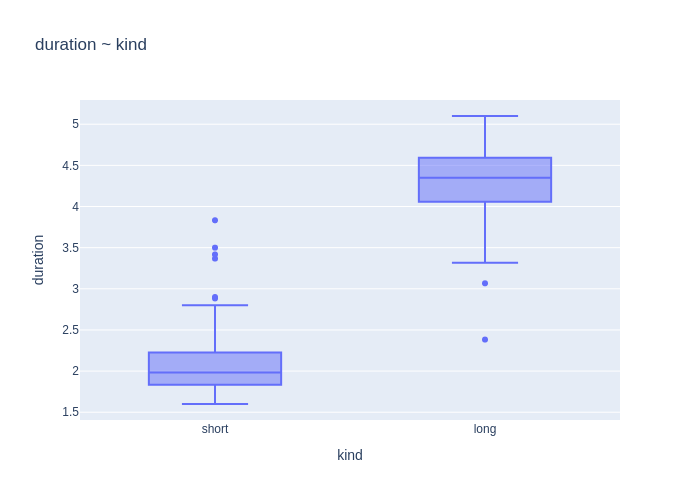

In [33]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

12: Identify which of the histograms suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models, and explain why the other three do not support this assumption.

    Model 2 is significantly skewed, model 3 shows less deviation but still shows deviation, model 4 does not fit the normal curve closely, so model 1 is the only one that suggests the plausibility of the assumption that the distribution of error terms is normal.

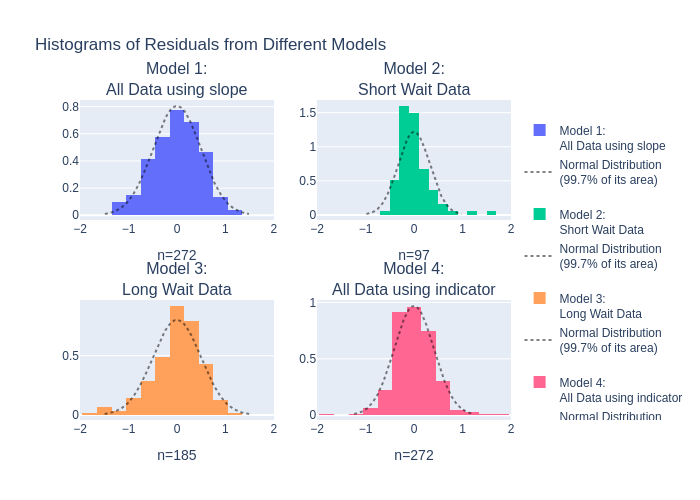

In [11]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

13: The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) hypothesis test; but, we can do "two sample" hypothesis testing using a permuation test, or create a 95% bootstrap confidence interval for the difference in means of the two populations.

    

(A) Do a permuation test H₀:μshort = μlong no difference in duration between short and long groups by "shuffling" the labels

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Create the short and long group labels
old_faithful['kind'] = old_faithful['waiting'].apply(lambda x: 'short' if x < 68 else 'long')

# Observed difference in means
short_duration = old_faithful[old_faithful['kind'] == 'short']['duration']
long_duration = old_faithful[old_faithful['kind'] == 'long']['duration']
observed_diff = long_duration.mean() - short_duration.mean()

# Permutation test
num_permutations = 10000
permuted_diffs = []

for _ in range(num_permutations):
    # Shuffle the labels
    shuffled_labels = np.random.permutation(old_faithful['kind'])
    # Reassign shuffled labels and calculate new difference in means
    shuffled_short = old_faithful['duration'][shuffled_labels == 'short']
    shuffled_long = old_faithful['duration'][shuffled_labels == 'long']
    permuted_diff = shuffled_long.mean() - shuffled_short.mean()
    permuted_diffs.append(permuted_diff)

# Calculate p-value
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))
print("Permutation Test p-value:", p_value)


Permutation Test p-value: 0.0


(B) Create a 95% bootstrap confidence interval by repeatedly bootstrapping within each group and applying np.quantile(bootstrapped_mean_differences, [0.025, 0.975]) to the collection of differences between the sample means.

In [32]:
# Bootstrap confidence interval
num_bootstrap_samples = 10000
bootstrapped_mean_differences = []
np.random.seed(15)
for _ in range(num_bootstrap_samples):
    # Bootstrap sample for each group
    bootstrap_short = np.random.choice(short_duration, size=len(short_duration), replace=True)
    bootstrap_long = np.random.choice(long_duration, size=len(long_duration), replace=True)
    # Calculate difference in means for the bootstrap samples
    mean_diff = bootstrap_long.mean() - bootstrap_short.mean()
    bootstrapped_mean_differences.append(mean_diff)

# 95% Confidence Interval
bootstrap_ci = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])
print("95% Bootstrap Confidence Interval for Difference in Means:", bootstrap_ci)


95% Bootstrap Confidence Interval for Difference in Means: [2.10355922 2.30277328]


(a) Explain how the sampling approaches work for the two simulations.

    In a permutation test, we simulate the null hypothesis by shuffling labels, while in a bootstrap confidence interval, we sample with replacement from each group independently.

(b) Compare and contrast these two methods with the indicator variable based model approach used in Question 11, explaining how they're similar and different.

    Both methods are non-parametic and tests if there is a difference in the eruption duration for the two groups. For the permutation test, we assume that the null-hypothesis holds while for the bootstrap confidence interval, we do not assume a null-hypothesis.

https://chatgpt.com/share/67293b52-2438-8001-b413-e67984a9f411

14: Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

    yes